In [24]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
#from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
from google.colab import files
file = files.upload()

Saving USA_cars_datasets.csv to USA_cars_datasets.csv


In [3]:
df = pd.read_csv("USA_cars_datasets.csv")
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [25]:
#Размерность?
print( 'Пропуски:', df.isna().sum())
print(df.dtypes)

Пропуски: Unnamed: 0      0
price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64
Unnamed: 0        int64
price             int64
brand             int64
model             int64
year              int64
title_status      int64
mileage         float64
color             int64
vin               int64
lot               int64
state             int64
country           int64
condition         int64
dtype: object


In [26]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['brand'])
df['brand'] = label_encoder.transform(df['brand'])

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['model'])
df['model'] = label_encoder.transform(df['model'])

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['title_status'])
df['title_status'] = label_encoder.transform(df['title_status'])

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['color'])
df['color'] = label_encoder.transform(df['color'])

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['vin'])
df['vin'] = label_encoder.transform(df['vin'])

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['state'])
df['state'] = label_encoder.transform(df['state'])

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['country'])
df['country'] = label_encoder.transform(df['country'])

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['condition'])
df['condition'] = label_encoder.transform(df['condition'])
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,27,25,2008,0,274117.0,2,2392,159348797,24,1,3
1,1,2899,8,92,2011,0,190552.0,39,1665,166951262,35,1,39
2,2,5350,7,75,2018,0,39590.0,39,1885,167655728,7,1,16
3,3,25000,8,32,2014,0,64146.0,4,967,167753855,39,1,20
4,4,27700,5,0,2018,0,6654.0,34,2087,167763266,6,1,20


In [27]:
X=df[['brand', 'model', 'year', 'title_status', 'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition']].values
y=df['price'].values

In [28]:
features = pd.Series(['brand', 'model', 'year', 'title_status', 'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition'])
features

0            brand
1            model
2             year
3     title_status
4          mileage
5            color
6              vin
7              lot
8            state
9          country
10       condition
dtype: object

In [44]:
slr = LinearRegression()
slr.fit(X, y)
coeff_df = pd.DataFrame(slr.coef_, columns=['Coefficient'])  
coeff_df['features'] = features
coeff_df

,Coefficient,features
0,-444.003521,brand


In [45]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [46]:
y_pred = model.predict(x)
y_pred

array([-17135.15211034,   7040.94831491,  19821.07604036, ...,
        14040.48905561,  15390.34038436,  14139.9815716 ])

In [47]:
'MSE: {:.3f}'.format(mean_squared_error(y, y_pred))

'MSE: 95599294.147'

In [49]:
print('slope:', model.coef_)
w0 = model.intercept_
w0

slope: [-3.64459204e+02  3.12918492e+01  8.52048147e+02 -6.29949332e+03
 -4.11343466e-02 -3.48612022e+01 -4.30083543e+00  1.00629896e-03
 -3.82710909e+01 -1.13735109e+04  2.64088948e+00]


-1845425.2190624934

Уравнение линейной регрессии:
-1845425-3.6x1+3.1x2+8.5x3-6.2x4-3.8x5-1.1x6+2.6x7

Сделаем тоже самое, только с одним признаком:

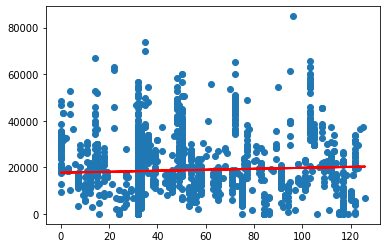

In [39]:
X = df[['model']].values
y = df['price'].values
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='red', linewidth=2)

In [40]:
'MSE: {:.3f}'.format(mean_squared_error(y, y_pred))

'MSE: 146327824.054'

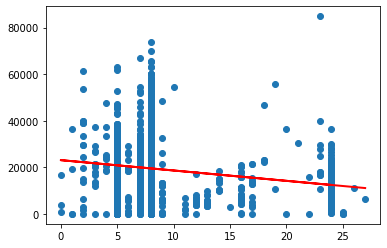

In [41]:
X = df[['brand']].values
y = df['price'].values
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='red', linewidth=2)

In [42]:
'MSE: {:.3f}'.format(mean_squared_error(y, y_pred))

'MSE: 139911575.146'

Самое лучшее соответствие у последнего графика.